### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I
### Due: Friday, June 10, 2022
---

## Final Project Report

## Project Title: **Trend Analysis of GDP Growth by Continent and per Capita**

## Student(s): 
*   **Kan Kim**
*   **Yena Lee**

#### Date:
*   **10 Jun 2022**

#### Abstract
---
*(Briefly summarize the project including the problem, data sets, and final findings.)* 

> This project uses different sources from the web to gather information and data about countries' annual GDP. We were looking to identify the general trends and patterns of GDP growth by continents from which we were able to conclude that there is a increasing pattern over time. We dived deeper into the problem to identify whether the pattern we found had any associations with the top ranked countries by their GDP per capita value. Interestingly, we objserved an unexpected outcome, because the continent which had the most noticeable growth had no close relationship with the top-ranked GDP per capita countries.

### 1. Introduction
---
*(Introduce the project, describe the objectives, and present the results. This section will provide an overview of the entire project including the description of the data sets and the specific data analytics methods and techniques the team used for analyzing the data to address the problem. Highlight the key findings.)* 

> For this project, we will utilize three datasets:
> 1. Country GDP Dataset (1960-2020) downloaded from Kaggle.
> 2. Country by Population (1950-2050) Dataset downloaded from Wikepedia.  
> 3. Country ISO Codes and Continents Dataset downloaded from Statistics Times.

> Our first and main dataset is comprised of the following three main components: 
> 1.   Country Name 
> 2.   Country Code
> 3.   GDP($) by Year from 1960~2020

> The key focus of our project is analyzing the GDP growth by continent and per capita, so in addition to the above attributes, we would also need two other attributes "Population" and "Continent". We will use the second and third dataset to filter and retrieve needed columns by indexing.  

> Once we have three dataframes respectively, we will clean them up and use either merge or join operation to create an organized dataframe from which we can finally conduct the actual data analysis. 

> Finally, using the organized dataframe we created, we can use the groupby function to make a sorted dataframe by continents. Also, we can divide the newly appended country populations from their respective GDP value to make a new column called "GDP_per_capita". 

> Since our dataframe is ready at this stage, we will implement either matplotlib or seaborn packages to make nice visualizations to draw meaningful insights about the trends and patterns. 

### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project. Where does the problem come from? Who would be benefited from the solutions presented in this project? Use formal languages and notations to define the problem as much as possible.)*

> We define our problem as "what is the observable trend and pattern from historical GDP data?" The specific sets of questions that we aim to analyze from this project are as follows:
> *   Are there any noticeable trends in terms of GDP growth by continent?
> *   How does the ranking of countries with the highest GDP per capita change overtime?

> GDP is one of the measurements tools that we use to analyze and observe the annual economic growth of a particular coutnry. Knowing the trend and changes over time in GDP growth not only benefits the policy makers in terms of what kind appropriate measures they should take but also allows inidividuals to take a closer look at the overall performance of a particular country's economy. 

> Our answers to these questions will present findings that would most likely benefit those knowledge seekers who are curious about the economic trends. 




### 3. Data Sources
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*


> Our GDP dataset is downloaded from Kaggle. According to the user who uploaded this dataset on Kaggle, the source of dataset is obtained from World Bank national accounts data and OECD National Accounts data files. This dataset is of a csv file format.

> Our country by population dataset is downloaded directly from the Wikepedia as a form of html file, and its orginal source comes from the International Data Base (IDB) Division of the United States Census Bureau. 

> The source of our country ISO codes and continents dataset is directly downloaded from Statistics Times website as a html file format.

> In order to access these datasets, we will first download them to our local computer. Then, we will upload them onto our google drives. Once this step is complete, we will mount google drive from our google colab project file and use the pandas module (pd.read_csv, pd.read_html) to read in and access the data.



### 4. Acquiring and Loading Data
---
*(Present the code and methods for acquiring the data. Load the data into appropriate format for analysis. Explain the process and results.)*

In [1]:
# Mounting drive to access downloaded files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
# Change current working directory
os.chdir("/content/drive/MyDrive/Colab Notebooks/INFO212/Final_Project")

#### Data Loading and Reading
---

In [6]:
# Load Kaggle's GDP csv file into df_GDP variable
# GDP data by year
df_GDP = pd.read_csv("Countries_GDP_1960-2020.csv")

In [7]:
# Load Population html file into tables variable 
# Population data by year
tables = pd.read_html("Populations.html")

In [8]:
# Load tables directly from the link (unable to download the file)
# Country ISO code and Continent
ISO = pd.read_html("https://statisticstimes.com/geography/countries-by-continents.php")

### 5. Exploring and Visualizing Data
---
*(Explore the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explain the process and the results.)*

### GDP Data Exploration
#### Findings:

*   Data cleansing seems necessary as there are records that show they are not actually a country but part of region or continent.
*   No need to deal with the missing value. We will just drop that record as its country name is invalid and has no use for our later analysis.
*   120 Records * 63 Columns

In [ ]:
# Information about the GDP data frame
df_GDP.info()

In [10]:
# Number of row x columns 
df_GDP.shape

(120, 63)

In [11]:
# List of column names
df_GDP.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [12]:
# Total number of missing values
df_GDP.isna().sum().sum()

1

In [13]:
# The row with missing value indicates the record is not actually a country but a region
df_GDP[df_GDP.isnull().any(axis=1)]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
106,Latin America & the Caribbean (IDA & IBRD coun...,TLA,NaN,8.414007e+10,9.211380e+10,9.369633e+10,1.040000e+11,1.120000e+11,1.230000e+11,1.250000e+11,...,5.890000e+12,5.940000e+12,6.090000e+12,6.210000e+12,5.140000e+12,5.010000e+12,5.590000e+12,5.460000e+12,5.380000e+12,4.480000e+12


In [14]:
# Display the data frame
df_GDP.head(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.430000e+11,9.510000e+11,9.640000e+11,9.850000e+11,9.200000e+11,8.730000e+11,9.850000e+11,1.010000e+12,1.010000e+12,9.210000e+11
1,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,6.710000e+11,7.280000e+11,8.210000e+11,8.650000e+11,7.610000e+11,6.910000e+11,6.840000e+11,7.420000e+11,7.950000e+11,7.850000e+11
2,Australia,AUS,1.860679e+10,1.968306e+10,1.992272e+10,2.153993e+10,2.380110e+10,2.597715e+10,2.730989e+10,3.044462e+10,...,1.400000e+12,1.550000e+12,1.580000e+12,1.470000e+12,1.350000e+12,1.210000e+12,1.330000e+12,1.430000e+12,1.390000e+12,1.330000e+12
3,Austria,AUT,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,1.157943e+10,...,4.310000e+11,4.090000e+11,4.300000e+11,4.420000e+11,3.820000e+11,3.960000e+11,4.160000e+11,4.550000e+11,4.450000e+11,4.330000e+11
4,Burundi,BDI,1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,1.654446e+08,1.782971e+08,...,2.235821e+09,2.333308e+09,2.451625e+09,2.705783e+09,3.104395e+09,2.732809e+09,2.748180e+09,2.668496e+09,2.631434e+09,2.841786e+09


### Population Data Exploration
#### Findings:


*   Last table is unnecessary for our later analysis.
*   Tables contain no null values.
*   228 Records * 44 Columns
*   Some columns are duplicates so further data cleansing is required.



In [15]:
# The number of total tables
len(tables)

4

In [ ]:
# Observe each table displayed as data frames separately
# final table is unnecessary for our analysis
tables[0].head(3)
tables[1].head(3)
tables[2].head(3)
tables[3].head(3)

In [17]:
# None of these tables contain null values.
tables[0].isna().sum()
tables[1].isna().sum()
tables[2].isna().sum()

Country (or dependent territory)    0
2020                                0
%                                   0
2025                                0
%.1                                 0
2030                                0
%.2                                 0
2035                                0
%.3                                 0
2040                                0
%.4                                 0
2045                                0
%.5                                 0
2050                                0
%.6                                 0
dtype: int64

In [18]:
# Merge first three tables
combined = pd.concat(tables[:-1], axis = 1)
combined.shape

(228, 44)

In [22]:
# Many duplicate column names
combined.columns

Index(['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1',
       '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5',
       'Country (or dependent territory)', '1985', '%', '1990', '%.1', '1995',
       '%.2', '2000', '%.3', '2005', '%.4', '2010', '%.5', '2015', '%.6',
       'Country (or dependent territory)', '2020', '%', '2025', '%.1', '2030',
       '%.2', '2035', '%.3', '2040', '%.4', '2045', '%.5', '2050', '%.6'],
      dtype='object')

### Country ISO Code & Continent Data Exploration
#### Findings:


*   249 Records * 7 Columns
*   Some columns are unnecessary for our analaysis
*   Need to drop a record where its ISO code value is missing



In [24]:
# Total number of tables
len(ISO)

3

In [29]:
# Third table has the information we need for our later analysis
# We only need the country name, ISO Code, and continent information
table_ISO = ISO[2]
table_ISO.head()

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania


In [28]:
# Shape of the table
table_ISO.shape

(249, 7)

In [30]:
# Find missing values
# Only one ISO code value missing
table_ISO.isna().sum()

No                   0
Country or Area      0
ISO-alpha3 Code      1
M49 Code             0
Region 1             0
Region 2           141
Continent            0
dtype: int64

In [31]:
# The record in which its ISO code value is null
table_ISO[table_ISO['ISO-alpha3 Code'].isnull()]

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
195,196,Sark,NaN,680,Northern Europe,Channel Islands,Europe


### 6. Wrangling and Cleansing Data
---
*(Cleanse the data, fill up missing data, and wrangle the data to prepare for analysis. Explain the process and the results.)*

### GDP Data Wrangling & Cleansing

In [33]:
# Create a list of string values with range of 1960~2021 with 5 interval
interval = [str(x) for x in np.arange(1960, 2021, 5)]
# Filter data frame by condition
df_GDP = df_GDP.filter(items = ['Country Name', 'Country Code'] + interval)

In [34]:
df_GDP.columns

Index(['Country Name', 'Country Code', '1960', '1965', '1970', '1975', '1980',
       '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020'],
      dtype='object')

In [35]:
df_GDP.head(5)

,Country Name,Country Code,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Africa Eastern and Southern,AFE,1.931311e+10,2.681057e+10,4.031578e+10,8.343557e+10,1.570000e+11,1.300000e+11,2.120000e+11,2.700000e+11,2.840000e+11,5.120000e+11,8.470000e+11,9.200000e+11,9.210000e+11
1,Africa Western and Central,AFW,1.040428e+10,1.486247e+10,2.350461e+10,5.144474e+10,1.120000e+11,1.170000e+11,1.220000e+11,1.080000e+11,1.400000e+11,3.110000e+11,5.920000e+11,7.610000e+11,7.850000e+11
2,Australia,AUS,1.860679e+10,2.597715e+10,4.133722e+10,9.733306e+10,1.500000e+11,1.810000e+11,3.110000e+11,3.680000e+11,4.160000e+11,6.950000e+11,1.150000e+12,1.350000e+12,1.330000e+12
3,Austria,AUT,6.592694e+09,9.994071e+09,1.537301e+10,4.005921e+10,8.205891e+10,6.938677e+10,1.660000e+11,2.410000e+11,1.970000e+11,3.160000e+11,3.920000e+11,3.820000e+11,4.330000e+11
4,Burundi,BDI,1.960000e+08,1.589950e+08,2.427326e+08,4.209867e+08,9.197267e+08,1.149979e+09,1.132101e+09,1.000428e+09,8.704861e+08,1.117113e+09,2.032135e+09,3.104395e+09,2.841786e+09


### Population Data Wrangling & Cleansing

In [38]:
# Drop duplicate columns
combined = combined.loc[:,~combined.columns.duplicated()]
# Some duplicate columns are dropped, but columns containing % sign is not necessary for our analysis
combined.columns

Index(['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1',
       '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5', '1985',
       '1990', '1995', '2000', '2005', '2010', '2015', '%.6', '2020', '2025',
       '2030', '2035', '2040', '2045', '2050'],
      dtype='object')

In [40]:
# Drop columns that contain "%"
combined.drop(list(combined.filter(regex = "%")), axis = 1, inplace = True)
combined.columns

Index(['Country (or dependent territory)', '1950', '1955', '1960', '1965',
       '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010',
       '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype='object')

In [41]:
# Drop year 1950 and 1955 as they are not captured in df_GDP
combined.drop(['1950', '1955'], axis = 1, inplace = True)
# Drop last 6 columns (2025~2050) as their GDP value is not recorded in df_GDP
df_population = combined.drop(combined.iloc[:,-6:], axis = 1)
df_population.columns

Index(['Country (or dependent territory)', '1960', '1965', '1970', '1975',
       '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020'],
      dtype='object')

In [43]:
df_population.head(3)

,Country (or dependent territory),1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Afghanistan,9830,10998,12431,14133,15045,13120,13569,19446,22462,26335,29121,32565,36644
1,Albania,1624,1884,2157,2402,2672,2957,3245,3159,3159,3025,2987,3030,3075
2,Algeria,10910,11964,13932,16141,18807,22009,25191,28322,30639,32918,35950,39543,42973


In [44]:
# Renaming columns for later join of multiple data frames by key values
df_population.rename(columns = {"Country (or dependent territory)": "Country Name"}, inplace = True)

In [45]:
# Renaming all year name columns by adding the suffix so that we can differentiate 
# these year columns from the df_GDP year columns after joining is complete 
df_population = df_population.set_index('Country Name').add_suffix('_population').reset_index()
df_population

,Country Name,1960_population,1965_population,1970_population,1975_population,1980_population,1985_population,1990_population,1995_population,2000_population,2005_population,2010_population,2015_population,2020_population
0,Afghanistan,9830,10998,12431,14133,15045,13120,13569,19446,22462,26335,29121,32565,36644
1,Albania,1624,1884,2157,2402,2672,2957,3245,3159,3159,3025,2987,3030,3075
2,Algeria,10910,11964,13932,16141,18807,22009,25191,28322,30639,32918,35950,39543,42973
3,American Samoa,21,25,28,30,33,39,48,54,58,57,56,55,54
4,Andorra,9,14,20,27,34,45,53,64,66,77,85,86,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Western Sahara,28,50,90,73,125,180,218,264,337,416,492,571,653
224,Yemen,5872,6511,7099,7935,9133,10540,12417,14832,17236,20003,23210,26738,29885
225,Zambia,3255,3695,4241,4849,5541,6536,7604,8691,9984,11373,13042,15067,17427
226,Zimbabwe,4011,4686,5515,6342,7170,8561,10157,11160,11821,11640,11652,14230,15832


### ISO & Continent Data Wrangling & Cleansing

In [46]:
# Rename columns for later join and merge purposes
table_ISO.rename(columns = {"Country or Area": "Country Name", "ISO-alpha3 Code": "Country Code"}, inplace = True)
table_ISO.columns

Index(['No', 'Country Name', 'Country Code', 'M49 Code', 'Region 1',
       'Region 2', 'Continent'],
      dtype='object')

In [48]:
# Select the necessary columns by slicing
df_ISO_continent = table_ISO.loc[:,('Country Name', 'Country Code', 'Continent')]
df_ISO_continent.head(3)

,Country Name,Country Code,Continent
0,Afghanistan,AFG,Asia
1,Åland Islands,ALA,Europe
2,Albania,ALB,Europe


### Merging and joining the above pre-processed data frames

In [54]:
# Merge df_ISO_continent and df_population data frames by the key "Country Name"
result = pd.merge(df_ISO_continent, df_population, on = 'Country Name')
# Some records are dropped as their country name does not match 
print(df_ISO_continent.shape, df_population.shape)
result.shape

(249, 3) (228, 14)


(198, 16)

In [55]:
# No missing values
result.isna().sum()

Country Name       0
Country Code       0
Continent          0
1960_population    0
1965_population    0
1970_population    0
1975_population    0
1980_population    0
1985_population    0
1990_population    0
1995_population    0
2000_population    0
2005_population    0
2010_population    0
2015_population    0
2020_population    0
dtype: int64

In [61]:
# Merge df_GDP and result by the key "Country Code"
final_result = pd.merge(df_GDP, result, on = ['Country Code'])
final_result.columns

Index(['Country Name_x', 'Country Code', '1960', '1965', '1970', '1975',
       '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020',
       'Country Name_y', 'Continent', '1960_population', '1965_population',
       '1970_population', '1975_population', '1980_population',
       '1985_population', '1990_population', '1995_population',
       '2000_population', '2005_population', '2010_population',
       '2015_population', '2020_population'],
      dtype='object')

In [67]:
# Each record represents a country and its data, we have a total of 82 different countries available for analysis
final_result.shape

(82, 29)

In [62]:
# Drop one of the duplicated country name columns
final_result.drop(['Country Name_y'], axis = 1, inplace = True)

In [63]:
# Rename the column
final_result.rename(columns = {'Country Name_x': 'Country Name'}, inplace = True)

In [64]:
# No missing values
final_result.isna().sum()

Country Name       0
Country Code       0
1960               0
1965               0
1970               0
1975               0
1980               0
1985               0
1990               0
1995               0
2000               0
2005               0
2010               0
2015               0
2020               0
Continent          0
1960_population    0
1965_population    0
1970_population    0
1975_population    0
1980_population    0
1985_population    0
1990_population    0
1995_population    0
2000_population    0
2005_population    0
2010_population    0
2015_population    0
2020_population    0
dtype: int64

In [65]:
final_result

,Country Name,Country Code,1960,1965,1970,1975,1980,1985,1990,1995,...,1975_population,1980_population,1985_population,1990_population,1995_population,2000_population,2005_population,2010_population,2015_population,2020_population
0,Australia,AUS,1.860679e+10,2.597715e+10,4.133722e+10,9.733306e+10,1.500000e+11,1.810000e+11,3.110000e+11,3.680000e+11,...,13772,14616,15696,16957,17976,19054,20233,21516,22752,23939
1,Austria,AUT,6.592694e+09,9.994071e+09,1.537301e+10,4.005921e+10,8.205891e+10,6.938677e+10,1.660000e+11,2.410000e+11,...,7579,7550,7560,7723,8048,8114,8315,8448,8666,8860
2,Burundi,BDI,1.960000e+08,1.589950e+08,2.427326e+08,4.209867e+08,9.197267e+08,1.149979e+09,1.132101e+09,1.000428e+09,...,3677,4298,4915,5509,5800,6716,7789,9121,10743,12632
3,Belgium,BEL,1.165872e+10,1.737146e+10,2.670620e+10,6.567819e+10,1.270000e+11,8.626826e+10,2.050000e+11,2.880000e+11,...,9795,9847,9859,9970,10156,10264,10470,10866,11324,11721
4,Benin,BEN,2.261956e+08,2.899087e+08,3.336278e+08,6.768701e+08,1.405252e+09,1.045713e+09,1.959965e+09,2.169627e+09,...,2996,3459,4031,4706,5647,6620,7778,9057,10449,11957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Uruguay,URY,1.242289e+09,1.890769e+09,2.137097e+09,3.538283e+09,1.016302e+10,4.732018e+09,9.298840e+09,1.929766e+10,...,2844,2931,3019,3086,3151,3220,3265,3302,3342,3388
78,St. Vincent and the Grenadines,VCT,1.306656e+07,1.510821e+07,1.845000e+07,3.323716e+07,8.234034e+07,1.456417e+08,2.403667e+08,3.160074e+08,...,93,99,104,108,109,108,107,105,103,102
79,South Africa,ZAF,7.575397e+09,1.133440e+10,1.841839e+10,3.811454e+10,8.298048e+10,5.908264e+10,1.160000e+11,1.720000e+11,...,25816,29252,34255,38504,42148,44914,48105,51123,53676,56464
80,Zambia,ZMB,7.130000e+08,1.082857e+09,1.825286e+09,2.618667e+09,3.829500e+09,2.281258e+09,3.285217e+09,3.807067e+09,...,4849,5541,6536,7604,8691,9984,11373,13042,15067,17427


### 7. Analyzing Data
---
*(Analyze the data by applying various data analytics methods. The analysis should be guided by the problem defined earlier. Explain the process and results.)*

### Answering our previously defined question:
"Are there any noticeable trends in terms of GDP growth by continent?"

In [69]:
# Subset only necessary columns
GDP_growth_by_continent = final_result[['Country Name', 'Continent'] + interval]
GDP_growth_by_continent.head()

,Country Name,Continent,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Australia,Oceania,1.860679e+10,2.597715e+10,4.133722e+10,9.733306e+10,1.500000e+11,1.810000e+11,3.110000e+11,3.680000e+11,4.160000e+11,6.950000e+11,1.150000e+12,1.350000e+12,1.330000e+12
1,Austria,Europe,6.592694e+09,9.994071e+09,1.537301e+10,4.005921e+10,8.205891e+10,6.938677e+10,1.660000e+11,2.410000e+11,1.970000e+11,3.160000e+11,3.920000e+11,3.820000e+11,4.330000e+11
2,Burundi,Africa,1.960000e+08,1.589950e+08,2.427326e+08,4.209867e+08,9.197267e+08,1.149979e+09,1.132101e+09,1.000428e+09,8.704861e+08,1.117113e+09,2.032135e+09,3.104395e+09,2.841786e+09
3,Belgium,Europe,1.165872e+10,1.737146e+10,2.670620e+10,6.567819e+10,1.270000e+11,8.626826e+10,2.050000e+11,2.880000e+11,2.360000e+11,3.860000e+11,4.810000e+11,4.620000e+11,5.220000e+11
4,Benin,Africa,2.261956e+08,2.899087e+08,3.336278e+08,6.768701e+08,1.405252e+09,1.045713e+09,1.959965e+09,2.169627e+09,3.519991e+09,6.567654e+09,9.535344e+09,1.138816e+10,1.565155e+10


In [70]:
# Group contries by continent and calculate its respective mean by year
GDP_growth_by_continent = GDP_growth_by_continent.groupby('Continent').mean()
GDP_growth_by_continent.head()

,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Continent,,,,,,,,,,,,,
Africa,1.044620e+09,1.436399e+09,2.193420e+09,4.809344e+09,1.009467e+10,9.669153e+09,1.275556e+10,1.371489e+10,1.495775e+10,2.857514e+10,4.824726e+10,5.354517e+10,5.357461e+10
Asia,1.482406e+10,2.183456e+10,3.564380e+10,7.590358e+10,1.424282e+11,1.829563e+11,3.551907e+11,6.133473e+11,6.232289e+11,7.696649e+11,1.309644e+12,1.699247e+12,2.115028e+12
Europe,1.298865e+10,2.152231e+10,3.372354e+10,7.977577e+10,1.568585e+11,1.303368e+11,3.174399e+11,3.765083e+11,3.488687e+11,5.867508e+11,7.079222e+11,6.412546e+11,6.986479e+11
North America,3.548792e+09,5.089547e+09,8.179191e+09,1.715673e+10,3.154562e+10,3.698783e+10,5.510532e+10,6.411824e+10,9.617676e+10,1.351294e+11,1.783113e+11,1.874354e+11,1.883318e+11
Oceania,6.316537e+09,8.822799e+09,1.406754e+10,3.312464e+10,5.124952e+10,6.152150e+10,1.051856e+11,1.248688e+11,1.403999e+11,2.342821e+11,3.891304e+11,4.588020e+11,4.530676e+11


In [72]:
# Apply lamda function to calculate continent mean GDP value in billions of dollars
GDP_growth_by_continent = GDP_growth_by_continent.apply(lambda x: x/10**9)
GDP_growth_by_continent.head()

,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Continent,,,,,,,,,,,,,
Africa,1.044620e-09,1.436399e-09,2.193420e-09,4.809344e-09,1.009467e-08,9.669153e-09,1.275556e-08,1.371489e-08,1.495775e-08,2.857514e-08,4.824726e-08,5.354517e-08,5.357461e-08
Asia,1.482406e-08,2.183456e-08,3.564380e-08,7.590358e-08,1.424282e-07,1.829563e-07,3.551907e-07,6.133473e-07,6.232289e-07,7.696649e-07,1.309644e-06,1.699247e-06,2.115028e-06
Europe,1.298865e-08,2.152231e-08,3.372354e-08,7.977577e-08,1.568585e-07,1.303368e-07,3.174399e-07,3.765083e-07,3.488687e-07,5.867508e-07,7.079222e-07,6.412546e-07,6.986479e-07
North America,3.548792e-09,5.089547e-09,8.179191e-09,1.715673e-08,3.154562e-08,3.698783e-08,5.510532e-08,6.411824e-08,9.617676e-08,1.351294e-07,1.783113e-07,1.874354e-07,1.883318e-07
Oceania,6.316537e-09,8.822799e-09,1.406754e-08,3.312464e-08,5.124952e-08,6.152150e-08,1.051856e-07,1.248688e-07,1.403999e-07,2.342821e-07,3.891304e-07,4.588020e-07,4.530676e-07


Text(0.5, 1.0, 'Mean GDP Growth by Continent by 5 Year Intervals')

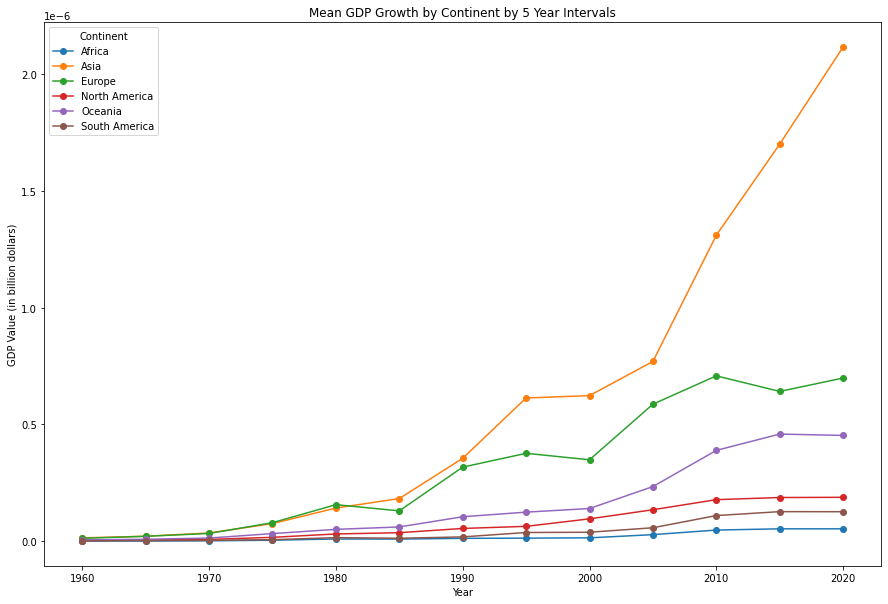

In [73]:
# Plotting the visualization
visualization = GDP_growth_by_continent.T.plot.line(figsize = (15,10), marker = 'o')
visualization.set_xlabel("Year")
visualization.set_ylabel("GDP Value (in billion dollars)")
visualization.set_title("Mean GDP Growth by Continent by 5 Year Intervals")

### Answering our previously defined question:
"How does the ranking of countries with the highest GDP per capita change overtime?"

In [102]:
year_idx = [str(x) for x in np.arange(1960, 2021, 5).tolist()]
population_idx = list(map(lambda x: x + '_population', year_idx))
print(year_idx)
print(population_idx)

['1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']
['1960_population', '1965_population', '1970_population', '1975_population', '1980_population', '1985_population', '1990_population', '1995_population', '2000_population', '2005_population', '2010_population', '2015_population', '2020_population']


In [103]:
# Function to create new columns that calculates GDP per capita
def per_capita(GDP, population):
  df = pd.DataFrame(GDP / population / 1000)
  df.columns = [GDP.name + '_GDP_by_capita']
  return df

In [104]:
# Add new GDP per capita columns to data frame 
for i in range(len(year_idx)):
  new_df = per_capita(final_result[year_idx[i]], final_result[population_idx[i]])
  col_name = ''.join(new_df.columns.tolist())
  final_result[col_name] = new_df

In [105]:
# We now see new columns about GDP_by_capita added to final_result data frame
final_result.columns

Index(['Country Name', 'Country Code', '1960', '1965', '1970', '1975', '1980',
       '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020',
       'Continent', '1960_population', '1965_population', '1970_population',
       '1975_population', '1980_population', '1985_population',
       '1990_population', '1995_population', '2000_population',
       '2005_population', '2010_population', '2015_population',
       '2020_population', '1960_GDP_by_capita', '1965_GDP_by_capita',
       '1970_GDP_by_capita', '1975_GDP_by_capita', '1980_GDP_by_capita',
       '1985_GDP_by_capita', '1990_GDP_by_capita', '1995_GDP_by_capita',
       '2000_GDP_by_capita', '2005_GDP_by_capita', '2010_GDP_by_capita',
       '2015_GDP_by_capita', '2020_GDP_by_capita'],
      dtype='object')

In [106]:
# Manipulate data frame to select only the columns with GDP_by_capita information with 10 year intervals
by_capita_list = final_result.iloc[:,-13:].columns.tolist()
GDP_by_capita_df = final_result.loc[:, by_capita_list]
# 10 year interval data frame
GDP_by_capita_10yr = GDP_by_capita_df.iloc[:,::2]
GDP_by_capita_df = pd.concat([final_result['Country Name'], GDP_by_capita_10yr], axis = 1)
GDP_by_capita_df.set_index('Country Name', inplace = True)

In [107]:
GDP_by_capita_df.head()

,1960_GDP_by_capita,1970_GDP_by_capita,1980_GDP_by_capita,1990_GDP_by_capita,2000_GDP_by_capita,2010_GDP_by_capita,2020_GDP_by_capita
Country Name,,,,,,,
Australia,1795.675244,3264.925031,10262.725780,18340.508345,21832.686050,53448.596393,55557.876269
Austria,935.399240,2058.517080,10868.730198,21494.237990,24279.023909,46401.515152,48871.331828
Burundi,69.602269,68.918958,213.989452,205.500318,129.613768,222.797418,224.967256
Belgium,1278.508893,2770.927168,12897.329136,20561.685055,22992.985191,44266.519418,44535.449194
Benin,110.017305,127.338839,406.259482,416.482202,531.720744,1052.814871,1308.985977


In [108]:
# Function to rank countries by their respective GDP per capita values
def rank(column):
  return column.rank()

In [109]:
# Loop through and make new ranking columns
for i in range(GDP_by_capita_df.shape[1]):
  name = GDP_by_capita_df.iloc[:,i].name
  GDP_by_capita_df[name + '_rank'] = rank(GDP_by_capita_df[name])
GDP_by_capita_df.columns

Index(['1960_GDP_by_capita', '1970_GDP_by_capita', '1980_GDP_by_capita',
       '1990_GDP_by_capita', '2000_GDP_by_capita', '2010_GDP_by_capita',
       '2020_GDP_by_capita', '1960_GDP_by_capita_rank',
       '1970_GDP_by_capita_rank', '1980_GDP_by_capita_rank',
       '1990_GDP_by_capita_rank', '2000_GDP_by_capita_rank',
       '2010_GDP_by_capita_rank', '2020_GDP_by_capita_rank'],
      dtype='object')

In [110]:
GDP_by_capita_df.head()

,1960_GDP_by_capita,1970_GDP_by_capita,1980_GDP_by_capita,1990_GDP_by_capita,2000_GDP_by_capita,2010_GDP_by_capita,2020_GDP_by_capita,1960_GDP_by_capita_rank,1970_GDP_by_capita_rank,1980_GDP_by_capita_rank,1990_GDP_by_capita_rank,2000_GDP_by_capita_rank,2010_GDP_by_capita_rank,2020_GDP_by_capita_rank
Country Name,,,,,,,,,,,,,,
Australia,1795.675244,3264.925031,10262.725780,18340.508345,21832.686050,53448.596393,55557.876269,78.0,77.0,71.0,69.0,67.0,79.0,77.0
Austria,935.399240,2058.517080,10868.730198,21494.237990,24279.023909,46401.515152,48871.331828,70.0,69.0,72.0,74.0,72.0,72.0,73.0
Burundi,69.602269,68.918958,213.989452,205.500318,129.613768,222.797418,224.967256,8.0,4.0,6.0,4.0,1.0,1.0,1.0
Belgium,1278.508893,2770.927168,12897.329136,20561.685055,22992.985191,44266.519418,44535.449194,73.0,73.0,77.0,70.0,69.0,70.0,70.0
Benin,110.017305,127.338839,406.259482,416.482202,531.720744,1052.814871,1308.985977,22.0,12.0,18.0,19.0,21.0,17.0,19.0


In [111]:
GDP_by_capita_col_list = list((GDP_by_capita_df.iloc[:,:7].columns))

In [112]:
# Make the lists of top 10 ranking by each year group
top_10_1960 = list(GDP_by_capita_df['1960_GDP_by_capita_rank'].sort_values(ascending = False)[:10].index)
top_10_1970 = list(GDP_by_capita_df['1970_GDP_by_capita_rank'].sort_values(ascending = False)[:10].index)
top_10_1980 = list(GDP_by_capita_df['1980_GDP_by_capita_rank'].sort_values(ascending = False)[:10].index)
top_10_1990 = list(GDP_by_capita_df['1990_GDP_by_capita_rank'].sort_values(ascending = False)[:10].index)
top_10_2000 = list(GDP_by_capita_df['2000_GDP_by_capita_rank'].sort_values(ascending = False)[:10].index)
top_10_2010 = list(GDP_by_capita_df['2010_GDP_by_capita_rank'].sort_values(ascending = False)[:10].index)
top_10_2020 = list(GDP_by_capita_df['2020_GDP_by_capita_rank'].sort_values(ascending = False)[:10].index)
# Make these ranking into data frames
top_10_1960_df = pd.DataFrame(GDP_by_capita_df.loc[top_10_1960, '1960_GDP_by_capita'])
top_10_1970_df = pd.DataFrame(GDP_by_capita_df.loc[top_10_1970, '1970_GDP_by_capita'])
top_10_1980_df = pd.DataFrame(GDP_by_capita_df.loc[top_10_1980, '1980_GDP_by_capita'])
top_10_1990_df = pd.DataFrame(GDP_by_capita_df.loc[top_10_1990, '1990_GDP_by_capita'])
top_10_2000_df = pd.DataFrame(GDP_by_capita_df.loc[top_10_2000, '2000_GDP_by_capita'])
top_10_2010_df = pd.DataFrame(GDP_by_capita_df.loc[top_10_2010, '2010_GDP_by_capita'])
top_10_2020_df = pd.DataFrame(GDP_by_capita_df.loc[top_10_2020, '2020_GDP_by_capita'])

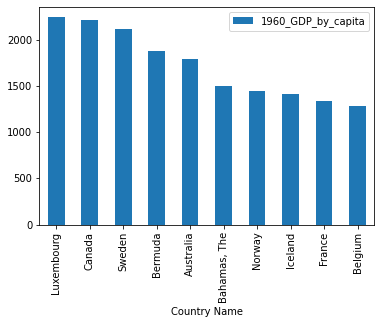

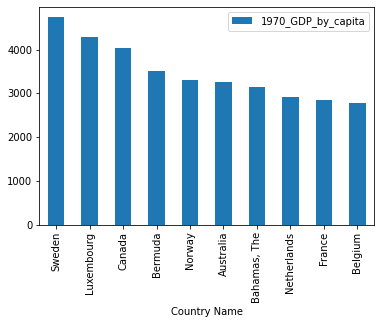

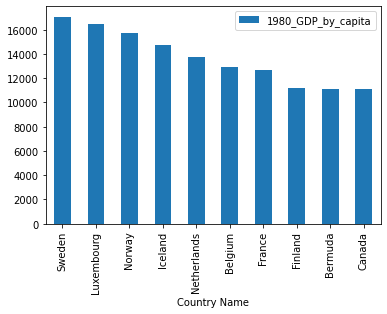

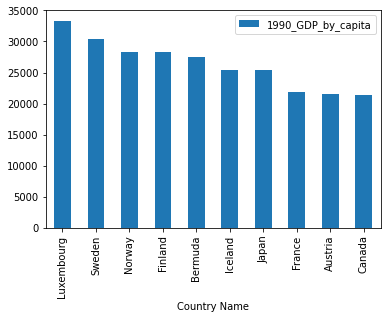

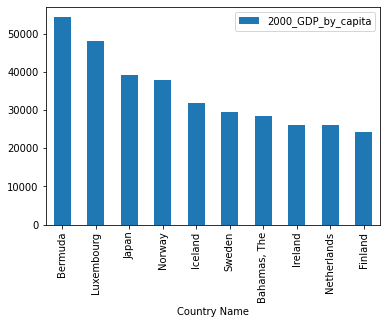

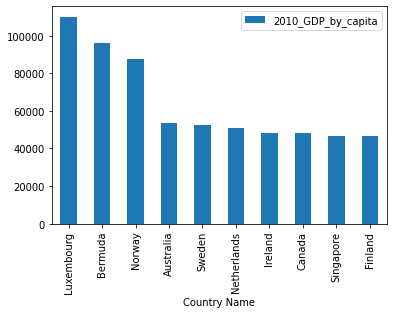

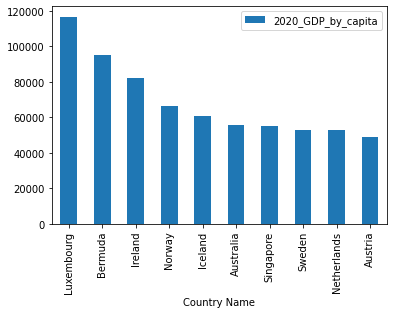

In [113]:
# Plot a bar chart for each respective year group 
top_10_list = [top_10_1960_df, top_10_1970_df, top_10_1980_df, top_10_1990_df, top_10_2000_df, top_10_2010_df, top_10_2020_df]

for i in range(len(top_10_list)):
  top_10_list[i].plot.bar()

### 8. Reporting Results
---
*(Use appropriate methods to present the results including tables, plots, and bullet points. Explain how the analysis process and results solve the problem.)*


**Are there any noticeable trends in terms of GDP growth by continent?**
> Plot 1.) Mean GDP Growth by Continent by 5 Year Intervals

**How does the ranking of countries with the highest GDP per capita change overtime?**
> Plot 2.) Top ranking countries by GDP per Capita in 10 Year Intervals


Text(0.5, 1.0, 'Mean GDP Growth by Continent by 5 Year Intervals')

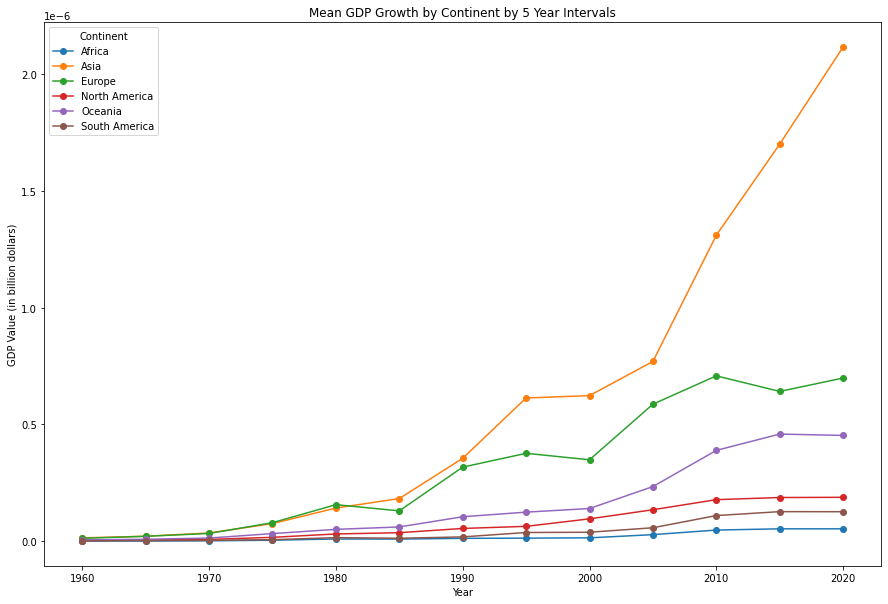

In [114]:
# Plotting the visualization
visualization = GDP_growth_by_continent.T.plot.line(figsize = (15,10), marker = 'o')
visualization.set_xlabel("Year")
visualization.set_ylabel("GDP Value (in billion dollars)")
visualization.set_title("Mean GDP Growth by Continent by 5 Year Intervals")


> *   Overall, the line chart shows Asia has the most outstanding performance in terms its mean GDP growth, followed by Europe and Oceania. 
> *   From 1990 and onward, Asia started to outperform other continents.
  - Hypothesis 1. Some Asian countries had drastic economic growth 
  - Hypothesis 2. All Asian countries made steady economic growth while others did not.  

In [ ]:
# Plot a bar chart for each respective year group 
top_10_list = [top_10_1960_df, top_10_1970_df, top_10_1980_df, top_10_1990_df, top_10_2000_df, top_10_2010_df, top_10_2020_df]

for i in range(len(top_10_list)):
  top_10_list[i].plot.bar()

> *  Interestingly, the majority of the top 10 countries with the highest GDP per capita from 1960 to 2020 belong to Europe.
> * Only Japan and Singapore from Asia made the appearance in the plots.
  - Leaning towards our second hypothesis approach.


### 9. Conclusion
---
*(Briefly describe what you have done and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

From our analysis, we were able to find a general pattern which is the mean GDP growth by continent eventually increases over time. It is just a matter of how steep the curve is. Although Asia, Europe, and Oceania showed relatively higher GDP growth in average, what needs to be considered is the fact that the cleansed data from which our analysis is based only takes account of partial records of the entire World's data. 

Our assumption on why the Asia had an exponential GDP growth the other continents did not was that Asian population until the late 1990s did not know how to work efficiently or lacked the technologies to help them advance or produce optimal outputs. 

However, what was interesting was that when we analyzed the top 10 ranked countries for GDP by capita, the countries that were on the list were pre-dominantly European countries. This shows that the reason why Asia showed such exponential growth is a rather complicated issue that is beyond the scope of this project. 

Possibly, the next step from here is taking a drill-down approach where we analyze the specific countries of interest from each continent and drawing insights from our findings to explain our aforementioned general pattern. 

Overall, this was a very fun project for us as we were able to fully implement everything we learned from in and outside of the class. The final project was a great hands on experience of what a data scientist might do in general. 

### 10. References

Kaggle Dataset Link:
*   https://www.kaggle.com/datasets/rinichristy/countries-gdp-19602020

Wikepedia Link:
*   https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population

Statistics Times Link:
* https://statisticstimes.com/geography/countries-by-continents.php


---
(*Use the following requirements for writing your reports. DO NOT DELETE THE CELLS BELLOW*)

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. The following course outcomes will be checked against the content of the report:

Upon successful completion of this course, a student will be able to:
* Describe the main steps and key issues in the process of acquiring and preparing data for data analytics.
* Set up data analysis environment by integrating commonly used practical tools and programming packages.   
* Explain different types of data storages and formats and apply appropriate tools for extracting and transforming data.
* Create interactive and programming code for cleansing, wrangling, reshaping, visualizing and analyzing various data sets. 
* Explain the concepts of aggregation and grouping, and apply tools and write programs to aggregate and group data.

** Marking will be foucsed on both presentation and content.** 

## Written Presentation Requirements
The report will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as its contents. Please make sure that the text of your report is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

## Technical Content:
* Is the problem well defined and described thoroughly?
* Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
* Did the report describe the charactriatics of the data?
* Did the report describe the goals of the data analysis?
* Did the analysis use plotting methods for visualization? Does the visualization convey meaningful messages?
* Did the analysis use wrangling, cleaning, and preparation methods? Does the work on wrangling, cleaning, and preparation demonstrate the student's knowlegde about these topics covered in this course?
* Did the analysis conduct aggretation and create descriptive statistics? Does the work on aggregation and descriptive statistics demonstrate the student's knowlegde about these topics covered in this course?
* Did the report include all related references?
* Only those projects that exceed the sophistication of the final data analysis examples and assignments can be marked as the highest level of grade.
* Overall, what is the rating of this project?